## Lab 6: Examining the Therapeutic Touch

Welcome to Lab 6!

After such an extensive introduction to programming for data science, we are finally moving into the section of the course where we can apply our new skils to answer real questions.  

In this lab, we'll use testing techniques that were introduced in lecture to test the idea of the therapeutic touch, the idea that some practictioners can feel and massage your human energy field. 

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### What is the Therapeutic Touch

The Therapeutic Touch (TT) is the idea that everyone can feel the Human Energy Field (HEF) around individuals. Certain practictioners claim they have the ability to feel the HEF and can massage it in order to promote health and relaxation in individuals. Those who practice TT have described different people's HEFs as "warm as Jell-O" and "tactile as taffy". 

TT was a popular technique used throughout the 20th century that was toted to be a great way to bring balance to a person's health. 

### Emily Rosa

Emily Rosa was a 4th grade student who had wide exposure to the world of TT due to her parents. Her parents were both medical practitioners and skeptics of the idea of TT. 

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. 

### Emily's Experiment

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily took 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and ask them to extend their hands through a screen (through which they can't see). Emily would be on the other side and would flip a coin. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to correctly answer which hand Emily put out. Overall, through 210 samples, the practitioner picked the correct hand 44% of the time. 

Emily's main goal here was to test whether or not the TT practicioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, *not* whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

**Question 1**: What are the null and alternative hypothesis for Emily's experiment? Discuss with students around you to come to a conclusion. 

**Your Answer Here:**

Null Hypothesis: Practitioners guess randomly. On average, He/she has 50% chance to guess correctly.

Alternative Hypothesis: No. she/he does not guess randomly.

**Question 2:** Remember that the practitioner got the correct answer 44% of the time. According to the null hypothesis, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

In [2]:
expected_correct = 0.5
expected_correct

0.5

The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 3:** What is a valid test statistic we can use to test our model? Assign `valid_ts` to a list of integers representing the following options: 

1. The difference of the expected percent correct and the actual percent correct
2. The absolute difference of the expected percent correct and the actual percent correct
3. The sum of the expected percent correct and the actual percent correct

There may be more than one correct answer. 

In [ ]:
valid_ts = 2
valid_ts

**Question 4:** Define the function `test_statistic` which takes in an expected proportion and an actual proportion, and returns the value of the test statistic chosen above. Assume that you are taking in proportions, but you want to return your answer as a percentage. 

*Hint:* Remember we are asking for a **percentage**, not a proportion. 

In [7]:
def test_statistic(expected_prop, actual_prop):
    return abs(expected_prop - actual_prop) * 100


**Question 5:** Use your newly defined function to calculate the observed test statistic from Emily's experiment. 

In [8]:
observed_test_statistic = test_statistic(expected_correct, .44)
observed_test_statistic

6.0

**Is this test statistic likely if the null hypothesis was true? Or is the deviation from the expected proportion due to something other than chance?**

In order to answer this question, we must simulate the experiment as though the null hypothesis was true, and calculate the test statistic per each simulation.

**Question 6:** To begin simulating, we should start by creating an array which has two items in it. The first item should be the proportion of times, assuming the null model is true, a TT practictioner picks the correct hand. The second item should be the proportion of times, under the same assumption, that the TT practicioner picks the incorrect hand. Assign `model_proportions` to this array. After this, simulate, using the `sample_proportions` function, Emily running through this experiment 210 times (as done in real life), and assign the proportion of correct answers to `simulation_proportion`. Lastly, define `one_test_statistic` to the test statistic of this one simulation. 

*Hint:* `sample_proportions` usage can be found here: [here](http://data8.org/sp18/python-reference.html)

In [15]:
model_proportions = [0.5, 0.5]
simulation_proportion = sample_proportions(210, model_proportions)
one_test_statistic = test_statistic(expected_correct, simulation_proportion.item(0))
one_test_statistic

3.809523809523807

**Question 7:** Let's now see what the distribution of test statistics is actually like under our fully specified model. Assign `simulated_test_statistics` to an array of 1000 test statistics that you simulated assuming the null hypothesis is true. 

*Hint:* This should follow the same pattern as normal simulations, in combination with the code you did in the previous problem.  

In [21]:
num_repetitions = 1000
num_guesses = 210

simulated_test_statistics = make_array()

for i in np.arange(num_repetitions):
    simulation_proportion = sample_proportions(num_guesses, model_proportions)
    one_test_statistic = test_statistic(expected_correct, simulation_proportion.item(0))
    simulated_test_statistics = np.append(simulated_test_statistics, one_test_statistic)


Let's view the distribution of the simulated test statistics under the null, and visually compare how the observed test statistic lies against the rest. 

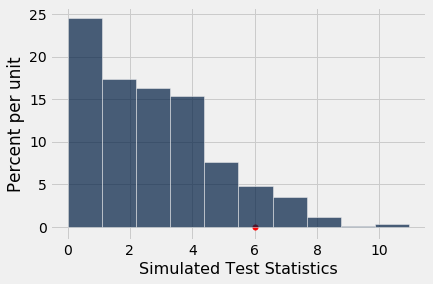

In [22]:
t = Table().with_column('Simulated Test Statistics', simulated_test_statistics)
t.hist()
plt.scatter(observed_test_statistic, 0, color='red', s=30)

We can make a visual argument as to whether or not we believe the observed test statistic is likely to occur under the null, or we can use the definition of p-values to help us make a more formal argument. 

**Question 8:** Assume `p_value` to the integer corresponding to the correct definition of what a p-value really is. 

1. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed
2. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative
3. The chance, under the alternative hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the null 
4. The number of times, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative

In [ ]:
p_value = 2
p_value

**Question 9:** Using the definition above, calculate the p-value of Emily's observed value in this experiment. 

*Hint:* If our test statistic is further in the direction of the alternative, will larger value or a smaller value? 

*Hint:* [This section](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty) of the textbook contains an example of calculating an empirical p-value.

In [26]:
emily_p_val = np.count_nonzero(simulated_test_statistics >= 6.0) / len(simulated_test_statistics)
emily_p_val

0.085

If our p-value is less than or equal to .05, then this is in favor of our alternative and we reject the null hypothesis. Otherwise, we do not have enough evidence against our null hypothesis. Note that this does **not** say we side in favor with the null hypothesis and accept it, but rather, that we just fail to reject it. 

This should help you make your own conclusions about Emily Rosa's experiment. 

Therapeutic touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards therapeutic touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

Think to yourself and be prepared to talk with your lab assistant and TA about the following questions as you get checked off: 

1. Do we reject the null hypothesis, or fail to reject it? 
2. What does this mean in terms of Emily's experiment? Do the TT practitioners' answers follow an even chance model or is there something else at play? 